In [3]:
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [30]:
df = pd.read_csv("training_ifswitch_after_dummy.csv", index_col = "id")
#df.drop("Unnamed: 0",axis=1, inplace=True)
df.shape
print(df.head())

    num_wave_voted  num_switch  switch_ratio  ifswitch  headHouseholdPast  \
id                                                                          
1                7           0      0.000000         0                1.0   
2               11           2      0.181818         1                1.0   
3               10           1      0.100000         1                1.0   
6                7           4      0.571429         1                1.0   
7                9           1      0.111111         1                1.0   

    fatherNumEmployees  motherNumEmployees  personality_agreeableness  \
id                                                                      
1                  NaN                 NaN                        6.0   
2                  NaN                 NaN                        6.0   
3                  NaN                 NaN                        7.0   
6                  NaN                 NaN                        5.0   
7                  NaN

In [31]:
X_train = df.loc[:,"headHouseholdPast":]
X_train.dropna(axis=1, how='any', inplace = True)
X_train.dropna(axis=0, how='any', inplace = True)
print(X_train.shape)

(51469, 5751)


In [23]:
X_train = df.loc[:,['countryOfBirth_England', 'disability_No', 'profile_newspaper_None',
       'gender_Female', 'gender_Male',
       'profile_religion_No, I do not regard myself as belonging to any particular religion.',
       'profile_education_age_20+', 'profile_eurefvote_Stay/remain in the EU',
       'profile_eurefturnout_Yes, voted', 'profile_education_age_17-18',
       'profile_education_age_16', 'profile_eurefvote_Leave the EU',
       'profile_past_vote_2005_Labour Party', 'profile_household_size_2',
       'marital_Married', 'profile_past_vote_2015_Labour',
       'profile_past_vote_2010_Labour Party',
       'profile_past_vote_2010_Conservative Party',
       'profile_gross_household_Prefer not to answer',
       'profile_past_vote_2010_Liberal Democrats']]
X_train.dropna(axis=1, how='any', inplace = True)
X_train.dropna(axis=0, how='any', inplace = True)
print(X_train.shape)

print(X_train)

(51470, 20)
       countryOfBirth_England  disability_No  profile_newspaper_None  \
id                                                                     
1                           1              0                       0   
2                           1              1                       0   
3                           0              1                       0   
4                           1              0                       0   
5                           1              0                       0   
8                           0              1                       0   
9                           0              0                       1   
11                          1              1                       0   
12                          0              1                       1   
13                          1              1                       0   
14                          1              1                       0   
15                          1              0        

In [32]:
forest = RandomForestClassifier(n_estimators = 1000, random_state=1)

#feat_labels = df.columns[df.columns.get_loc("headHouseholdPast"):]
feat_labels = X_train.columns
y_train = df.loc[:,"ifswitch"]
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [33]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) countryOfBirth.1_England       0.003019
 2) countryOfBirth.2_England       0.002965
 3) countryOfBirth_England         0.002663
 4) countryOfBirth.3_England       0.002554
 5) gender.3_Female                0.002020
 6) profile_household_children_0   0.002020
 7) gender.1_Male                  0.002017
 8) profile_household_children.3_0 0.002008
 9) disability.2_No                0.002008
10) gender.2_Male                  0.002005
11) disability.3_No                0.001998
12) disability.1_No                0.001998
13) disability_No                  0.001997
14) gender.2_Female                0.001996
15) gender.3_Male                  0.001996
16) gender.1_Female                0.001995
17) gender_Male                    0.001989
18) gender_Female                  0.001979
19) profile_household_children.2_0 0.001900
20) profile_religion.1_No, I do not regard myself as belonging to any particular religion. 0.001885
21) profile_household_children.1_0 0.001825
22) profile_religion

300) profile_past_vote_2015.3_Liberal Democrat 0.000788
301) profile_newspaper_The Guardian 0.000785
302) marital_Divorced               0.000784
303) profile_newspaper.3_The Guardian 0.000784
304) country.3_England              0.000782
305) gor_North West                 0.000782
306) gor.3_North West               0.000780
307) profile_newspaper.1_The Guardian 0.000779
308) marital.1_Divorced             0.000779
309) country.1_England              0.000778
310) countryOfBirth.1_Scotland      0.000775
311) country_England                0.000773
312) gor.1_North West               0.000771
313) gor.2_North West               0.000765
314) profile_gross_household.2_Â£35,000 to Â£39,999 per year 0.000753
315) profile_gross_personal.2_Â£30,000 to Â£34,999 per year 0.000747
316) profile_gross_personal.1_Â£30,000 to Â£34,999 per year 0.000746
317) gor.1_East of England          0.000744
318) gor.3_East of England          0.000741
319) profile_past_vote_2005.2_Don't know 0.000741
320) pr

876) euRefLA.3_S12000046            0.000184
877) profile_oslaua.3_Lewisham      0.000183
878) profile_socialgrade_cie.3_Methodist 0.000183
879) profile_ethnicity_Indian       0.000183
880) profile_turnout_2015.2_Don't know 0.000182
881) profile_oslaua.3_Bury          0.000182
882) profile_lea.3_East Riding of Yorkshire 0.000182
883) euRefLA.2_S12000046            0.000182
884) profile_oslaua.3_North Lanarkshire 0.000182
885) profile_education_age_Can't remember 0.000182
886) profile_socialgrade_cie.3_None 0.000182
887) euRefLA.1_E06000052            0.000181
888) profile_lea.3_Cheshire West and Chester 0.000181
889) profile_lea.2_Cheshire East    0.000181
890) profile_oslaua.2_South Lanarkshire 0.000181
891) profile_oslaua.3_Croydon       0.000181
892) profile_newspaper.3_The Scotsman 0.000180
893) profile_oslaua.2_York          0.000180
894) profile_oslaua.1_Bury          0.000180
895) profile_lea.1_Cheshire East    0.000180
896) euRefLA.1_E08000025            0.000180
897) profile_t

1849) onscode.3_W07000062            0.000111
1850) euRefLA.2_E08000010            0.000111
1851) euRefLA.2_E07000045            0.000111
1852) euRefLA.3_E06000043            0.000111
1853) profile_oslaua.2_Tower Hamlets 0.000111
1854) profile_oslaua.2_Mendip        0.000111
1855) profile_oslaua.3_Hackney       0.000111
1856) profile_lea.3_Bridgend         0.000111
1857) profile_lea.3_South Ayrshire   0.000111
1858) onscode.3_E14000614            0.000111
1859) profile_oslaua.2_Rugby         0.000111
1860) profile_oslaua.3_West Berkshire 0.000111
1861) profile_oslaua.3_Islington     0.000111
1862) profile_oslaua.2_Denbighshire  0.000111
1863) profile_oslaua.1_Derby         0.000111
1864) profile_oslaua.2_Basildon      0.000111
1865) profile_oslaua.3_Newport       0.000111
1866) onscode.2_S14000056            0.000111
1867) profile_oslaua.1_New Forest    0.000111
1868) euRefLA.1_E07000045            0.000111
1869) onscode.2_S14000034            0.000111
1870) onscode.2_E14000590        

2632) onscode.3_W07000076            0.000092
2633) onscode.2_E14001024            0.000092
2634) profile_oslaua.3_Hambleton     0.000092
2635) onscode.2_E14000905            0.000092
2636) onscode.1_E14000656            0.000091
2637) onscode.1_E14000641            0.000091
2638) euRefLA.3_E07000197            0.000091
2639) profile_oslaua.1_Rochford      0.000091
2640) onscode.3_E14001062            0.000091
2641) onscode.2_E14000784            0.000091
2642) onscode.2_E14000730            0.000091
2643) onscode.1_W07000074            0.000091
2644) profile_lea.2_Tameside         0.000091
2645) euRefLA.1_E08000021            0.000091
2646) profile_oslaua.3_Rother        0.000091
2647) onscode.2_S14000003            0.000091
2648) euRefLA.2_E09000026            0.000091
2649) onscode.1_E14000553            0.000091
2650) profile_oslaua.2_Sevenoaks     0.000091
2651) onscode.3_E14000680            0.000091
2652) profile_oslaua.1_Wycombe       0.000091
2653) onscode.1_E14000913         

3972) onscode.2_E14001039            0.000069
3973) onscode.3_E14000943            0.000069
3974) profile_lea.2_Inverclyde       0.000069
3975) onscode.2_E14001017            0.000069
3976) onscode.2_E14000538            0.000069
3977) onscode.3_S14000038            0.000069
3978) profile_oslaua.3_Horsham       0.000069
3979) profile_oslaua.1_Stratford-on-Avon 0.000069
3980) onscode.3_E14000652            0.000069
3981) euRefLA.3_E07000066            0.000069
3982) profile_oslaua.1_Three Rivers  0.000069
3983) onscode.1_E14000987            0.000069
3984) euRefLA.1_E07000008            0.000069
3985) onscode.1_E14000531            0.000069
3986) onscode.2_E14000959            0.000069
3987) onscode.3_E14000982            0.000069
3988) onscode.1_W07000056            0.000069
3989) profile_oslaua.2_South Northamptonshire 0.000069
3990) profile_oslaua.3_Taunton Deane 0.000069
3991) onscode.3_S14000032            0.000068
3992) euRefLA.1_E09000019            0.000068
3993) onscode.1_E1400

4823) onscode.1_E14000933            0.000054
4824) onscode.3_E14000532            0.000054
4825) profile_oslaua.3_Brentwood     0.000054
4826) profile_oslaua.1_Rossendale    0.000053
4827) onscode.1_E14000657            0.000053
4828) onscode.2_E14000933            0.000053
4829) onscode.3_E14001050            0.000053
4830) profile_oslaua.1_Oxford        0.000053
4831) onscode.3_E14000963            0.000053
4832) profile_ethnicity_Bangladeshi  0.000053
4833) euRefLA.1_E07000004            0.000053
4834) profile_ethnicity.3_Bangladeshi 0.000053
4835) euRefLA.2_E07000130            0.000053
4836) euRefLA.2_E07000212            0.000053
4837) profile_ethnicity.1_Bangladeshi 0.000053
4838) onscode.3_E14000739            0.000053
4839) euRefLA.1_E06000038            0.000053
4840) profile_oslaua.1_Fylde         0.000053
4841) onscode.2_E14000657            0.000053
4842) onscode.2_W07000052            0.000053
4843) euRefLA.3_E07000204            0.000053
4844) euRefLA.3_E06000009       

5726) euRefLA.2_L99999999            0.000001
5727) euRefLA.3_N09000003            0.000001
5728) profile_oslaua.1_Newry and Mourne 0.000001
5729) euRefLA.2_N09000003            0.000000
5730) profile_lea.2_Southern         0.000000
5731) profile_oslaua.2_Antrim        0.000000
5732) euRefLA.1_N09000003            0.000000
5733) gor.3_Northern Ireland         0.000000
5734) profile_oslaua.3_Newry and Mourne 0.000000
5735) euRefLA.1_M99999999            0.000000
5736) euRefLA.3_M99999999            0.000000
5737) profile_lea.3_Southern         0.000000
5738) euRefLA.3_N09000005            0.000000
5739) profile_oslaua.1_Antrim        0.000000
5740) euRefLA.2_M99999999            0.000000
5741) profile_lea.1_Southern         0.000000
5742) gor_Northern Ireland           0.000000
5743) profile_oslaua.3_Antrim        0.000000
5744) euRefLA.2_N09000005            0.000000
5745) gor.2_Northern Ireland         0.000000
5746) profile_oslaua.2_Newry and Mourne 0.000000
5747) euRefLA.3_N09000007

20


ValueError: shape mismatch: objects cannot be broadcast to a single shape

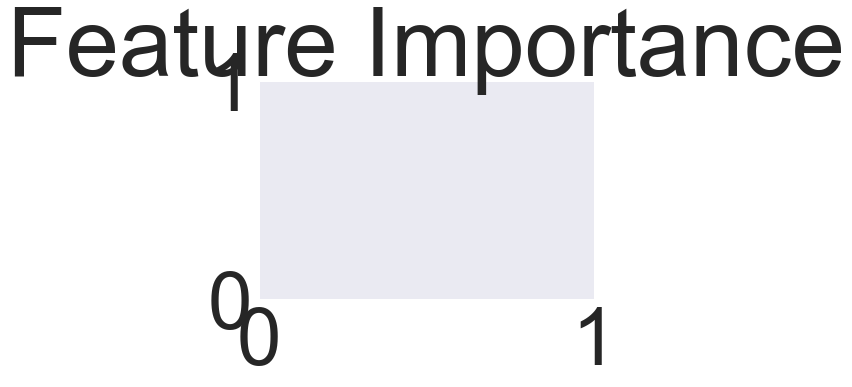

In [24]:
indices = np.argsort(importances)[::-1]
feat_labels = X_train.columns
print(len(feat_labels))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
#plt.tight_layout()
plt.savefig('if_switch_features.png', dpi=500)
plt.show()


In [19]:
sorted_feat_labels = feat_labels[indices][:]
sorted_feat_labels = sorted_feat_labels[:20]
print(sorted_feat_labels)
X_train = df.loc[:,sorted_feat_labels]
X_train.dropna(axis=1, how='any', inplace = True)
X_train.dropna(axis=0, how='any', inplace = True)

print(X_train.shape)

Index(['countryOfBirth_England', 'disability_No', 'profile_newspaper_None',
       'gender_Female', 'gender_Male',
       'profile_religion_No, I do not regard myself as belonging to any particular religion.',
       'profile_education_age_20+', 'profile_eurefvote_Stay/remain in the EU',
       'profile_eurefturnout_Yes, voted', 'profile_education_age_17-18',
       'profile_education_age_16', 'profile_eurefvote_Leave the EU',
       'profile_past_vote_2005_Labour Party', 'profile_household_size_2',
       'marital_Married', 'profile_past_vote_2015_Labour',
       'profile_past_vote_2010_Labour Party',
       'profile_past_vote_2010_Conservative Party',
       'profile_gross_household_Prefer not to answer',
       'profile_past_vote_2010_Liberal Democrats'],
      dtype='object')
(51470, 20)


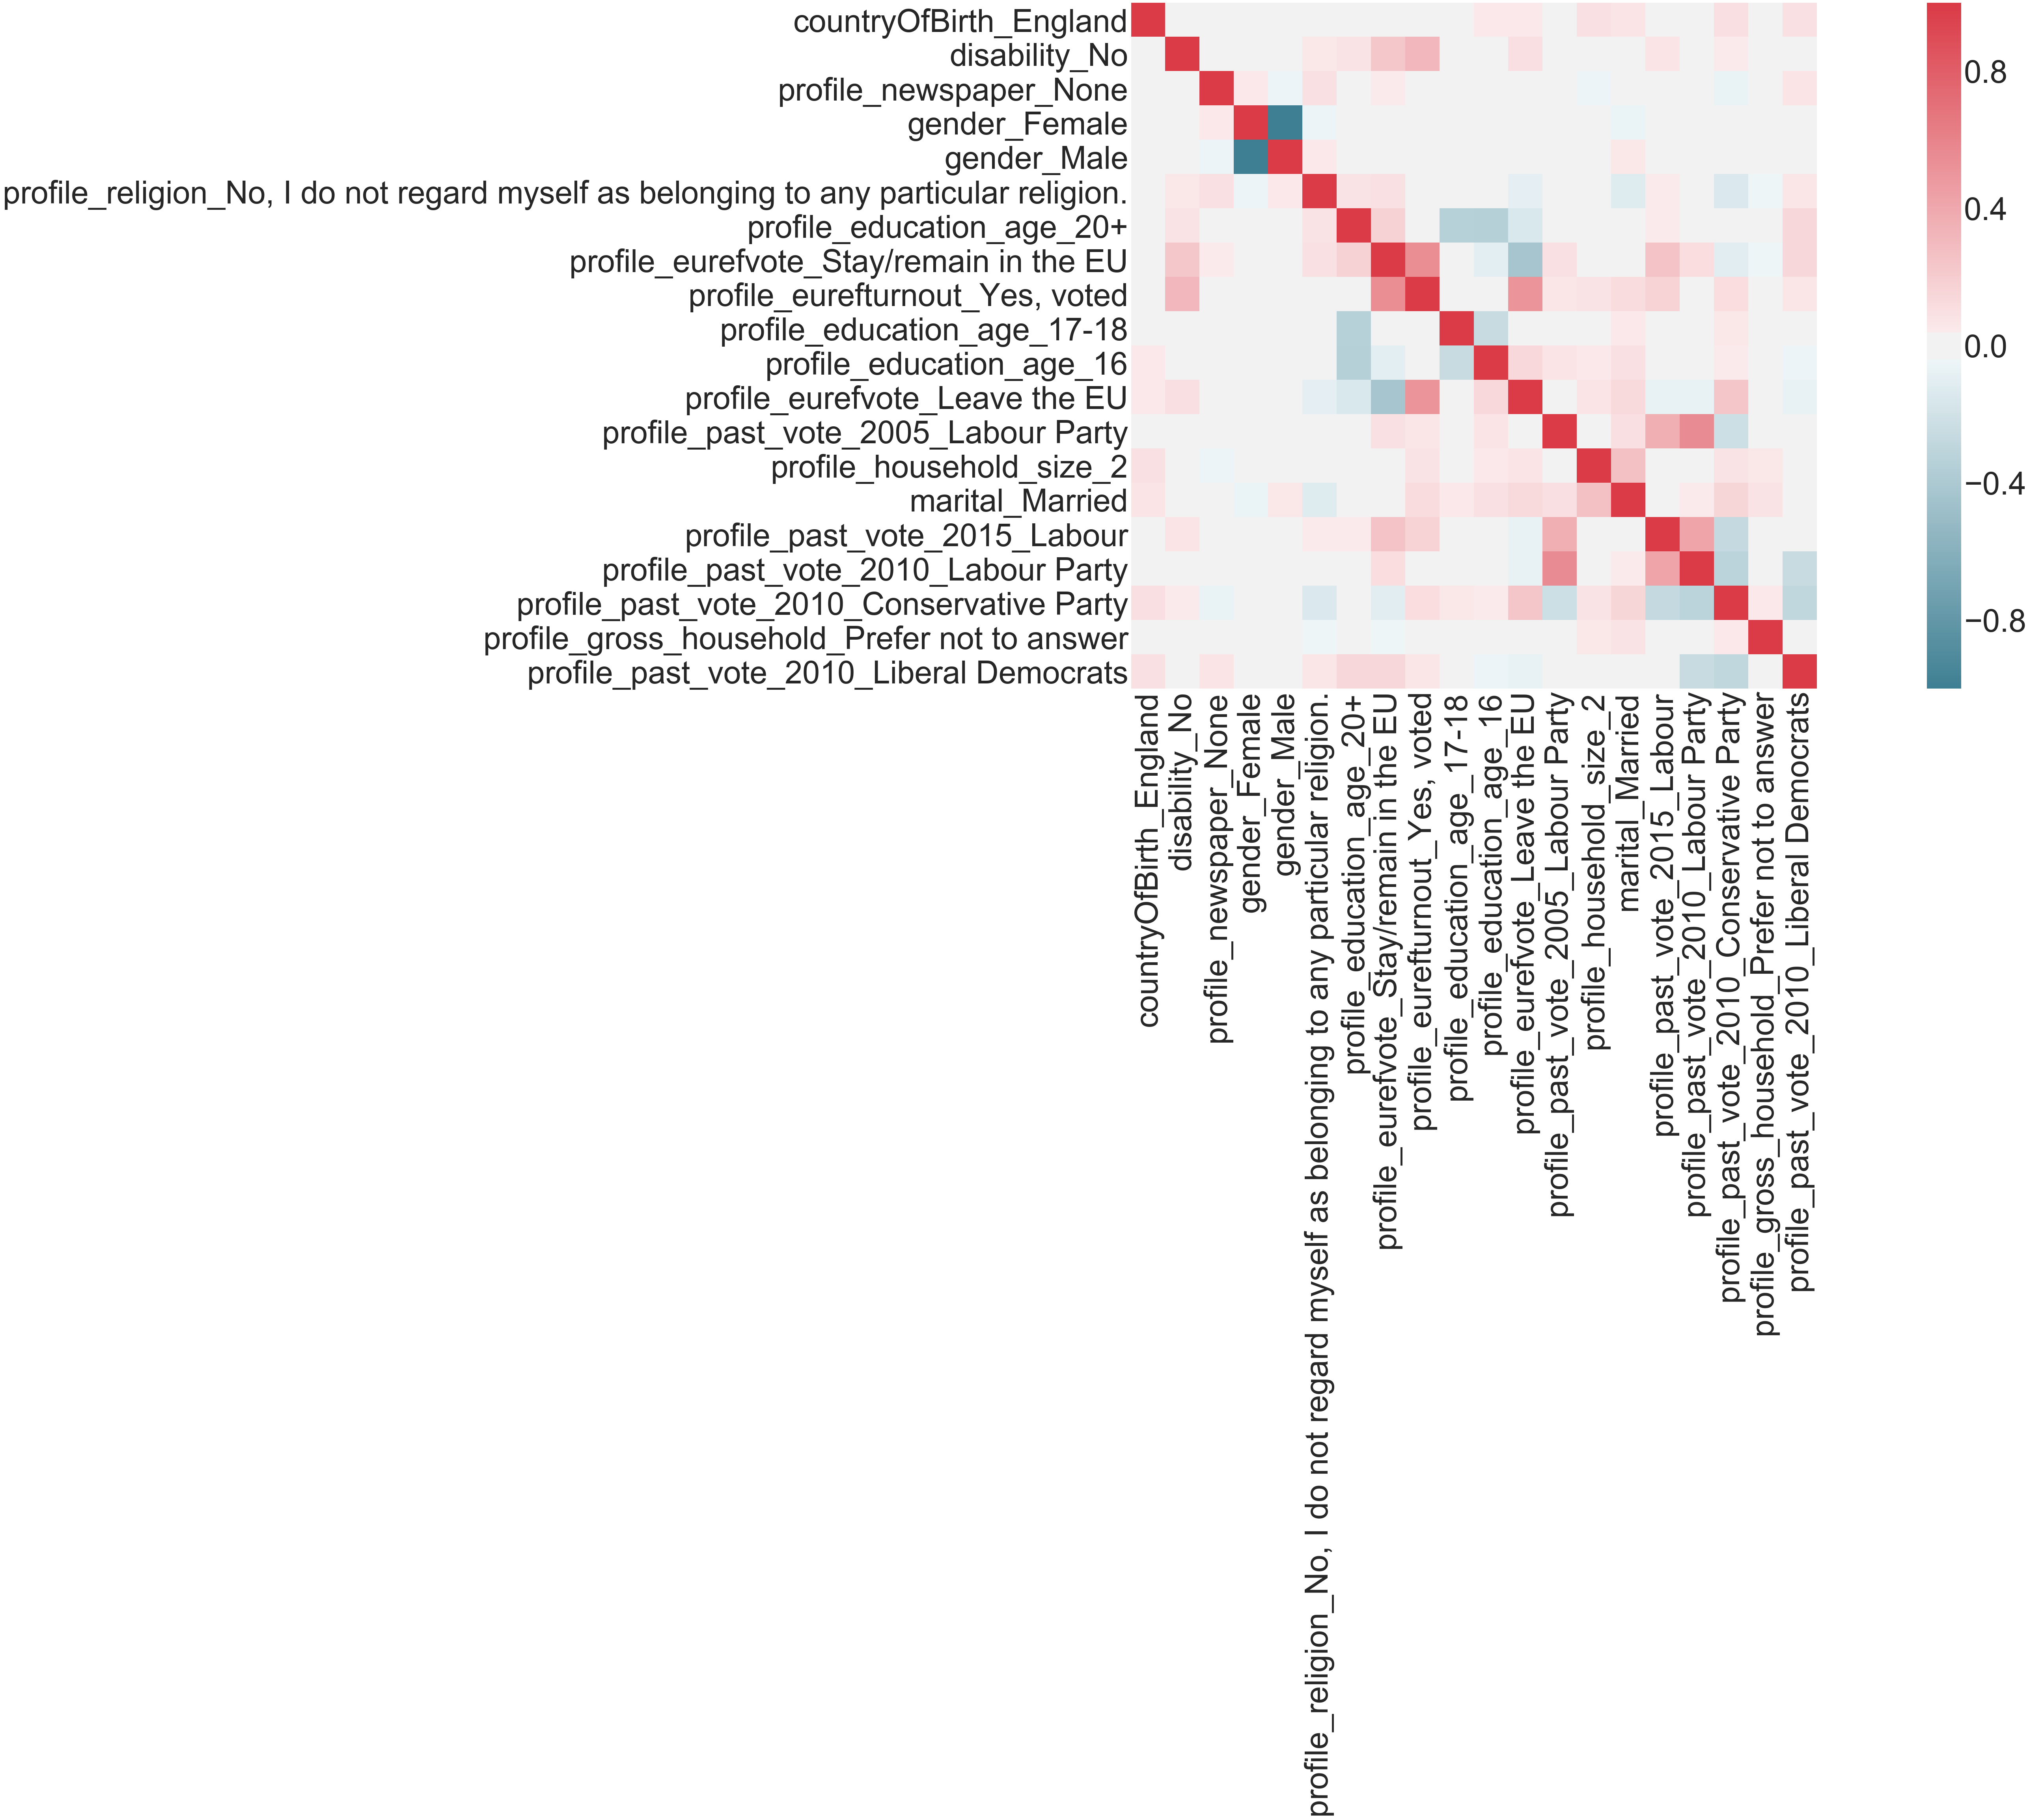

In [25]:
#f, ax = plt.subplots(figsize=(400, 320))
f, ax = plt.subplots(figsize=(100, 32))
corr = X_train.corr()
sns.set(font_scale=8)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#plt.savefig('correlation_if_switch.png', dpi=300)
plt.show()

       countryOfBirth_England  disability_No  profile_newspaper_None  \
id                                                                     
1                           1              0                       0   
2                           1              1                       0   
3                           0              1                       0   
4                           1              0                       0   
5                           1              0                       0   
8                           0              1                       0   
9                           0              0                       1   
11                          1              1                       0   
12                          0              1                       1   
13                          1              1                       0   
14                          1              1                       0   
15                          1              0                    